In [1]:
#from statsmodels.tsa.arima_process import ArmaProcess 
#from statsmodels.tsa.stattools import pacf, acf
#from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def neighbour_average(pre_list,result,lon,lat):
    shift = [[-0.25,0,0.25],[-0.25,0,0.25]]
    shift_list = []
    for element in itertools.product(*shift):
        shift_list.append(element)
    shift_list.remove((0,0))
    r = []
    for x,y in shift_list:
        if (lon + x,lat + y) in pre_list:
            j = pre_list.index((lon + x,lat + y))
            r.append(result.iloc[:,j].values)
        #else:
         #   print("NO")
          #  print(lon + x,lat + y)
           # r.append(np.zeros(817))   
    r = np.array(r)        
    return(np.average(r, axis=0))

In [3]:
level = 12
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lon_min":320,"lon_max":60,"lat_min":-40,"lat_max":40}

# Clustring in terms of Temperature

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


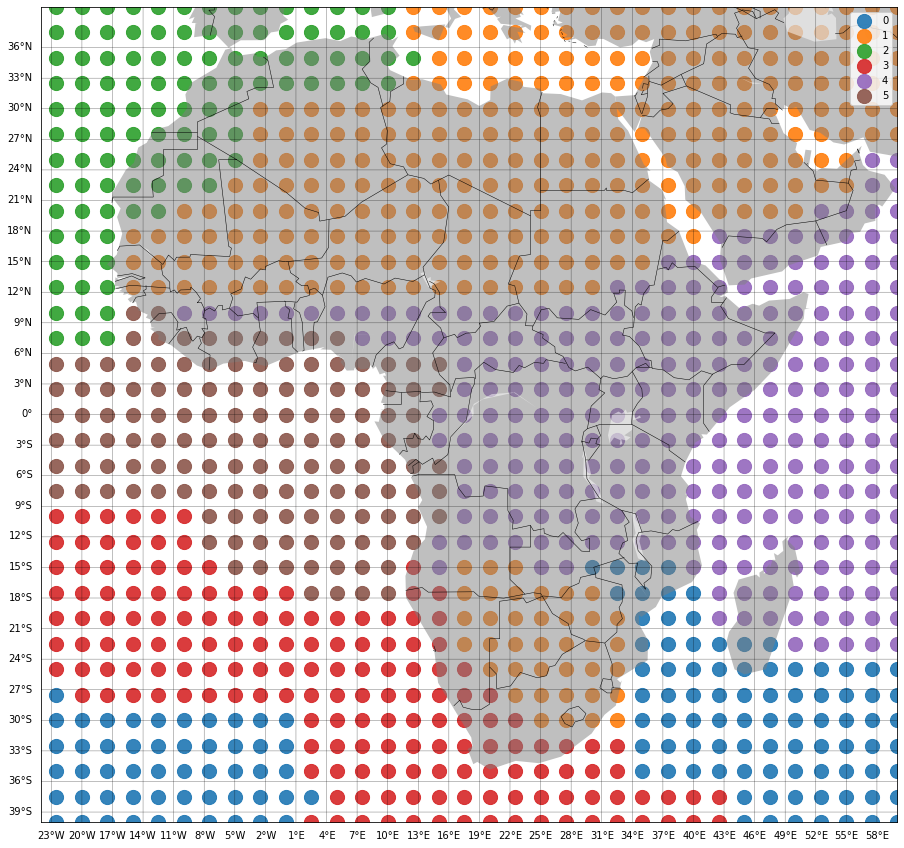

In [27]:
n_components = 6

d = Data('./temperature_africa.nc','air',temporal_limits,missing_value=-9.96921e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

result = pd.DataFrame(result)
result = pf.deseasonalize(np.array(result))
#result = np.array(result)

temp = np.array(result)
clustering = AgglomerativeClustering(n_clusters=n_components).fit(np.transpose(temp))

df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

clusters = clustering.labels_

df_list = []
for j in range(len(set(clusters))):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcountries()
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

i = 0
for j in set(clusters):
    values = df["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i)
    i+=1

plt.savefig("../plots/clusters.png")  
plt.legend()
plt.show()

# Clustring in terms of Precipitation

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


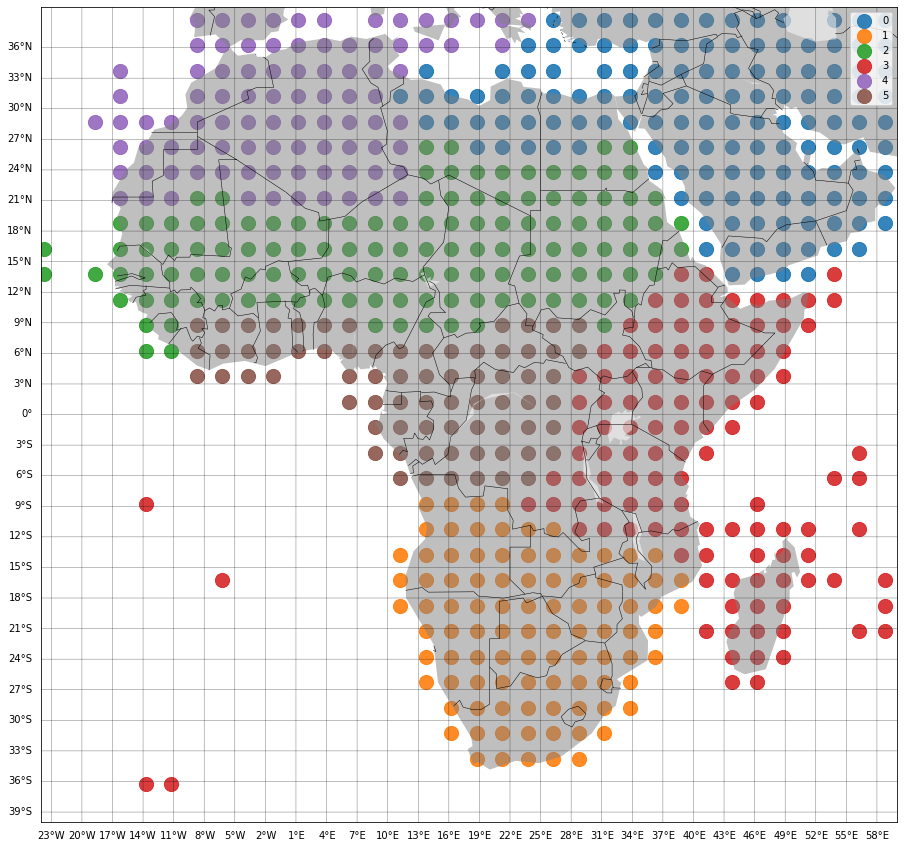

In [3]:
n_components = 6

d = Data('../precipitation.nc','precip',temporal_limits,missing_value=-9.96921e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

result = pd.DataFrame(result)
result = pf.deseasonalize(np.array(result))
#result = np.array(result)

temp = np.array(result)
clustering = AgglomerativeClustering(n_clusters=n_components).fit(np.transpose(temp))

df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

clusters = clustering.labels_

df_list = []
for j in range(len(set(clusters))):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcountries()
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

i = 0
for j in set(clusters):
    values = df["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i)
    i+=1

plt.savefig("../plots/clusters.png")  
plt.legend()
plt.show()

In [5]:
cluster_id = 5
rolling_n =12
extreme_type = "dry"
n_components = 6

In [6]:
f = 12
n = 30

In [72]:
n_components = 6
level = 12
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

d = Data('../GPCC_half.nc','precip',temporal_limits, missing_value=-9.96921e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

result = pf.deseasonalize(np.array(result))

d = Data('../air_monthly_mean_africa.nc','air', missing_value=-9.96921e+36)

result_air = d.get_data()
lon_list_air = d.get_lon_list()
lat_list_air = d.get_lat_list()
lon_air = d.get_lon()
lat_air = d.get_lat()

result_air = pf.deseasonalize(np.array(result_air))

#result = transform(result)

air_list = list(zip(lon_list_air,lat_list_air))
pre_list = list(zip(lon_list,lat_list))

In [45]:
clean_list = []
Idx = []
loc_list = []
for i in range(len(air_list)):
    temp = neighbour_average(pre_list,pd.DataFrame(result),air_list[i][0], air_list[i][1])
    if temp.shape:
    #if not np.isnan(temp):
        clean_list.append(temp)
        Idx.append(i)
        loc_list.append(air_list[i])

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [73]:
precipitation = np.array(clean_list)#/np.array(clean_list).std()
precipitation = pd.DataFrame(np.transpose(precipitation))

result_air = pd.DataFrame(result_air)
temperature = result_air.iloc[:,Idx]

In [74]:
lon_list = [list(t) for t in zip(*loc_list)][0]
lat_list = [list(t) for t in zip(*loc_list)][1]

In [79]:
temp = np.array(precipitation)
clustering = AgglomerativeClustering(n_clusters=n_components).fit(np.transpose(temp))

df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

In [80]:
lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

clusters = clustering.labels_

# Clustering on both Precipitationa and Temperature

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


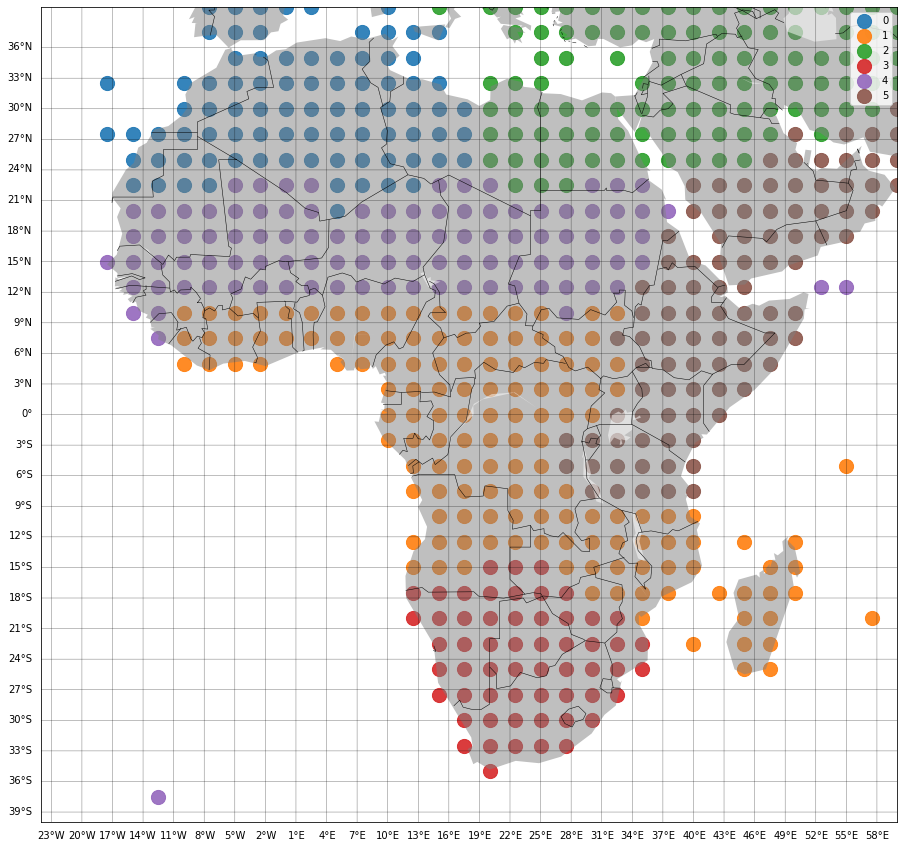

In [150]:
df_list = []
for j in range(len(set(clusters))):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcountries()
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

i = 0
for j in set(clusters):
    values = df["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i)
    i+=1

#plt.savefig("../plots/clusters.png")  
plt.legend()
plt.show()

In [95]:
temperature.columns = precipitation.columns
Idx = np.where((df.clusters == cluster_id).values)[0]
precip = precipitation.iloc[:,Idx]
air = temperature.iloc[:,Idx]

In [109]:
precip_agg = precip.rolling(rolling_n).mean()
precip_agg = precip_agg.iloc[rolling_n - 1:,:]

air_agg = air.rolling(rolling_n).mean()
air_agg = air_agg.iloc[rolling_n - 1:,:]

N = precip_agg.shape[0]

d3 = N - (n*f + 1)

In [110]:
result_index_precip = []
result_index_air = []
for k in range(d3):
    onset = k
    end = k + (n*f - (rolling_n - 1))

    if extreme_type == "wet":
        a = precip_agg.iloc[onset:end,:].quantile(0.95).values
        b = precip_agg.iloc[end + (rolling_n - 1),:].values
        index = np.where(np.greater(b,a))[0]

    else:
        a = precip_agg.iloc[onset:end,:].quantile(0.05).values
        b = precip_agg.iloc[end + (rolling_n - 1),:].values
        
        c = air_agg.iloc[onset:end,:].quantile(0.95).values
        d = air_agg.iloc[end + (rolling_n - 1),:].values
        
        index = np.where(np.greater(a,b))[0]
        index_air = np.where(np.greater(d,c))[0]
    result_index_precip.append(index)
    result_index_air.append(index_air)

In [111]:
number_precip = []
for i in range(len(result_index_precip)):
    number_precip.append(len(result_index_precip[i]))
    
number_air = []
for i in range(len(result_index_air)):
    number_air.append(len(result_index_air[i]))

In [112]:
if rolling_n == 12:
    start_date = "19781201"
else:
    start_date = "19780{}01".format(rolling_n)
df_oni = pd.DataFrame({"n_precip":number_precip, "n_air":number_air},
                  index=pd.date_range(start_date, periods=len(number_precip), freq='MS')
                  )

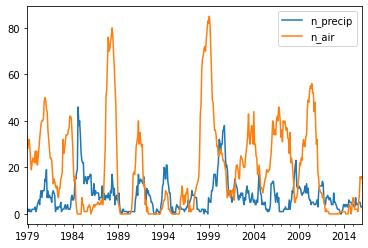

In [113]:
df_oni.plot()

In [5]:
#regions_countries = [kalahari,horn,equator,sahara_south, sahara_north, middle_east]

regions = ["kalahari","horn","equator","sahara_south", "sahara_north", "middle_east"]

In [11]:
def plot_rainfall_temperature(region, rolling_n =12, extreme_type = "dry", n_components = 6):
    code_convertor = {"kalahari":1,"horn":3, "equator":5, "sahara_south":2, "sahara_north":4, "middle_east":0}
    cluster_id = code_convertor[region]

    f = 12
    n = 30

    n_components = 6
    level = 12
    temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
    spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

    d = Data('../GPCC_half.nc','precip',temporal_limits, missing_value=-9.96921e+36)

    result = d.get_data()
    lon_list = d.get_lon_list()
    lat_list = d.get_lat_list()
    lon = d.get_lon()
    lat = d.get_lat()

    #result = pf.deseasonalize(np.array(result))

    d = Data('../air_monthly_mean_africa.nc','air', missing_value=-9.96921e+36)

    result_air = d.get_data()
    lon_list_air = d.get_lon_list()
    lat_list_air = d.get_lat_list()
    lon_air = d.get_lon()
    lat_air = d.get_lat()

    #result_air = pf.deseasonalize(np.array(result_air))

    #result = transform(result)

    air_list = list(zip(lon_list_air,lat_list_air))
    pre_list = list(zip(lon_list,lat_list))


    clean_list = []
    Idx = []
    loc_list = []
    for i in range(len(air_list)):
        temp = neighbour_average(pre_list,pd.DataFrame(result),air_list[i][0], air_list[i][1])
        if temp.shape:
        #if not np.isnan(temp):
            clean_list.append(temp)
            Idx.append(i)
            loc_list.append(air_list[i])

    precipitation = np.array(clean_list)#/np.array(clean_list).std()
    precipitation = pd.DataFrame(np.transpose(precipitation))

    result_air = pd.DataFrame(result_air)
    temperature = result_air.iloc[:,Idx]

    lon_list = [list(t) for t in zip(*loc_list)][0]
    lat_list = [list(t) for t in zip(*loc_list)][1]

    temp = np.array(precipitation)
    clustering = AgglomerativeClustering(n_clusters=n_components).fit(np.transpose(temp))

    df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

    lon_temp = df["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df["lons"] = lon_temp

    clusters = clustering.labels_

    Idx = np.where((df.clusters == cluster_id).values)[0]
    precip = precipitation.iloc[:,Idx]
    air = temperature.iloc[:,Idx]

    precip_agg = precip.rolling(rolling_n).apply(sum)
    precip_agg = precip_agg.iloc[rolling_n - 1:,:]

    air_agg = air.rolling(rolling_n).mean()
    air_agg = air_agg.iloc[rolling_n - 1:,:]

    N = precip_agg.shape[0]

    d3 = N - (n*f + 1)

    result_index_precip = []
    result_index_air = []
    for k in range(d3):
        onset = k
        end = k + (n*f - (rolling_n - 1))

        if extreme_type == "wet":
            a = precip_agg.iloc[onset:end,:].quantile(0.95).values
            b = precip_agg.iloc[end + (rolling_n - 1),:].values
            index = np.where(np.greater(b,a))[0]

        else:
            a = precip_agg.iloc[onset:end,:].quantile(0.05).values
            b = precip_agg.iloc[end + (rolling_n - 1),:].values

            c = air_agg.iloc[onset:end,:].quantile(0.95).values
            d = air_agg.iloc[end + (rolling_n - 1),:].values

            index = np.where(np.greater(a,b))[0]
            index_air = np.where(np.greater(d,c))[0]
        result_index_precip.append(index)
        result_index_air.append(index_air)

    number_precip = []
    for i in range(len(result_index_precip)):
        number_precip.append(len(result_index_precip[i]))

    number_air = []
    for i in range(len(result_index_air)):
        number_air.append(len(result_index_air[i]))

    if rolling_n == 12:
        start_date = "19781201"
    else:
        start_date = "19780{}01".format(rolling_n)
    df_oni = pd.DataFrame({"n_precip":number_precip, "n_air":number_air},
                      index=pd.date_range(start_date, periods=len(number_precip), freq='MS')
                      )

    df_norm = (df_oni - df_oni.mean())/df_oni.std() 
    
    
    title = "Extremes of temperature and rainfall - Region {}".format(region)
    plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
    fig = plot.get_figure()
    filename = "../plots/IDD/tempRainfall/region_{}_{}.png".format(region, extreme_type)
    correlation = df_norm.corr(method = 'spearman')
    corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    fig.text(0.1,0.9,corr_text,fontsize=18)
    fig.savefig(filename)
    
    
    #df_norm.plot()
    return(df_oni)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/math

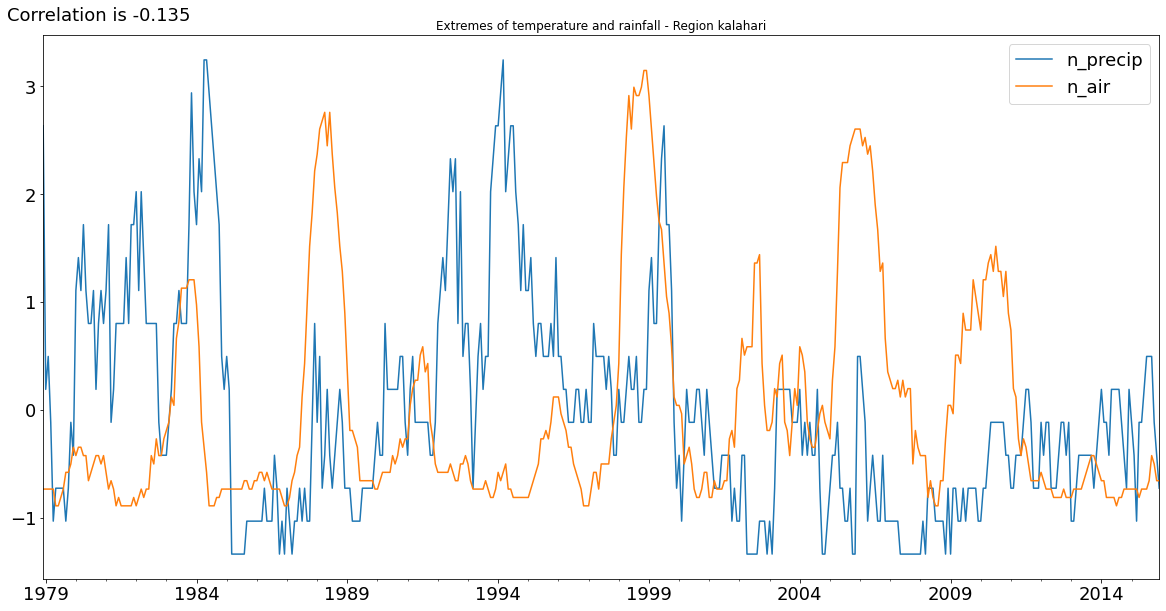

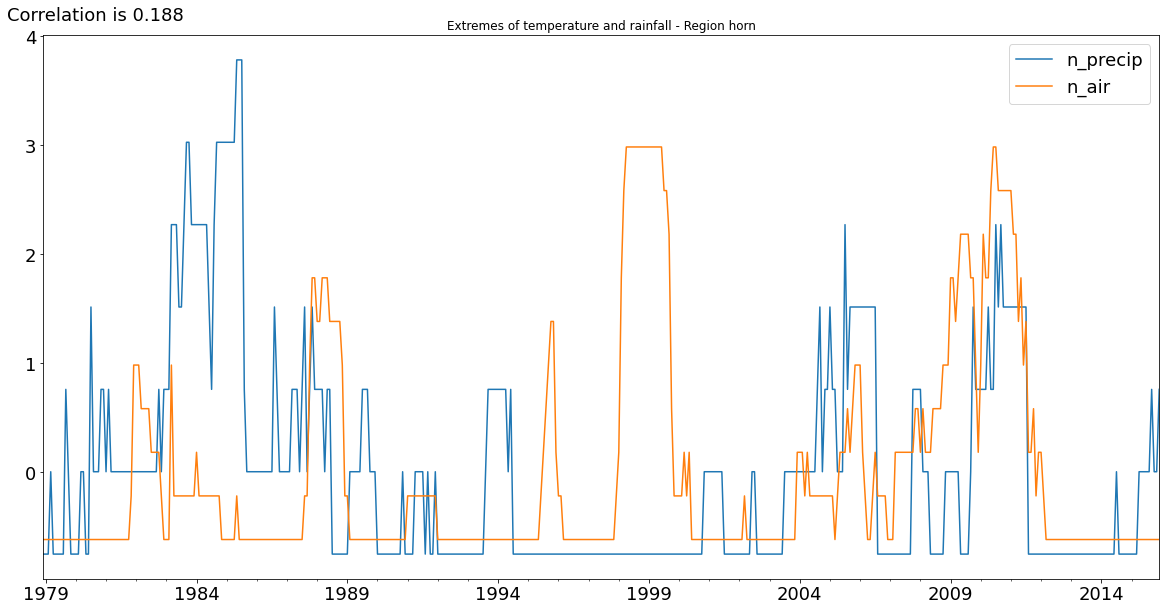

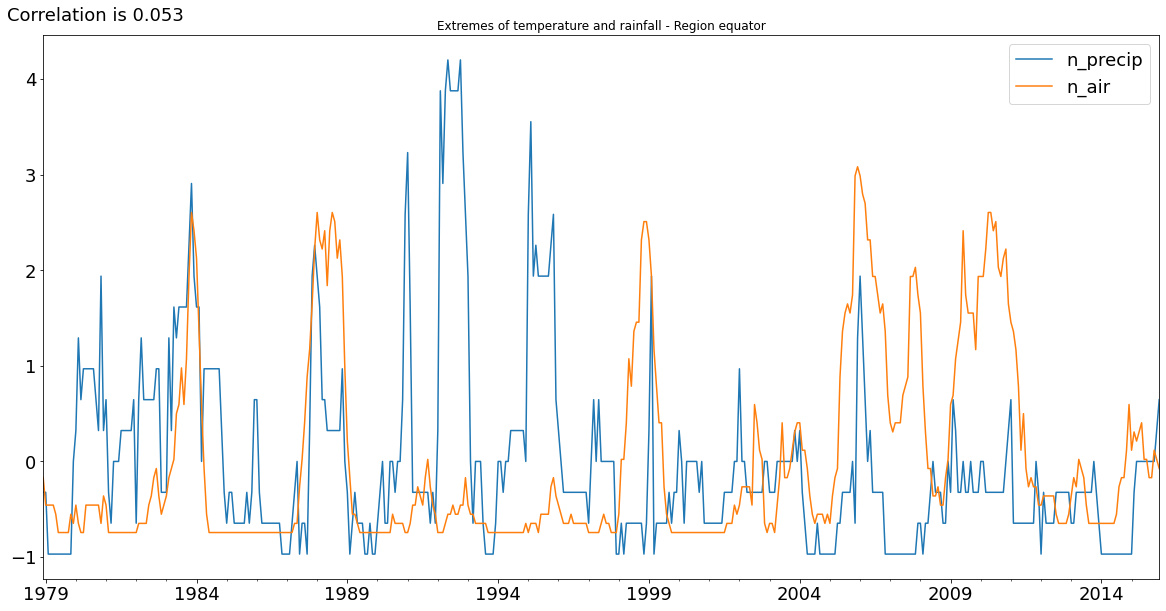

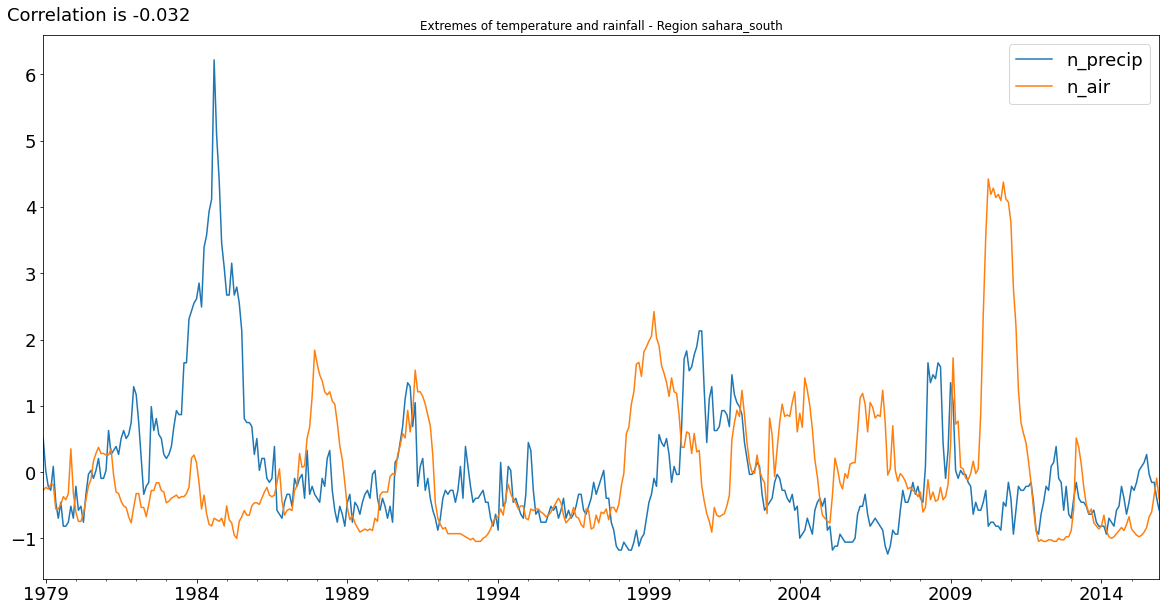

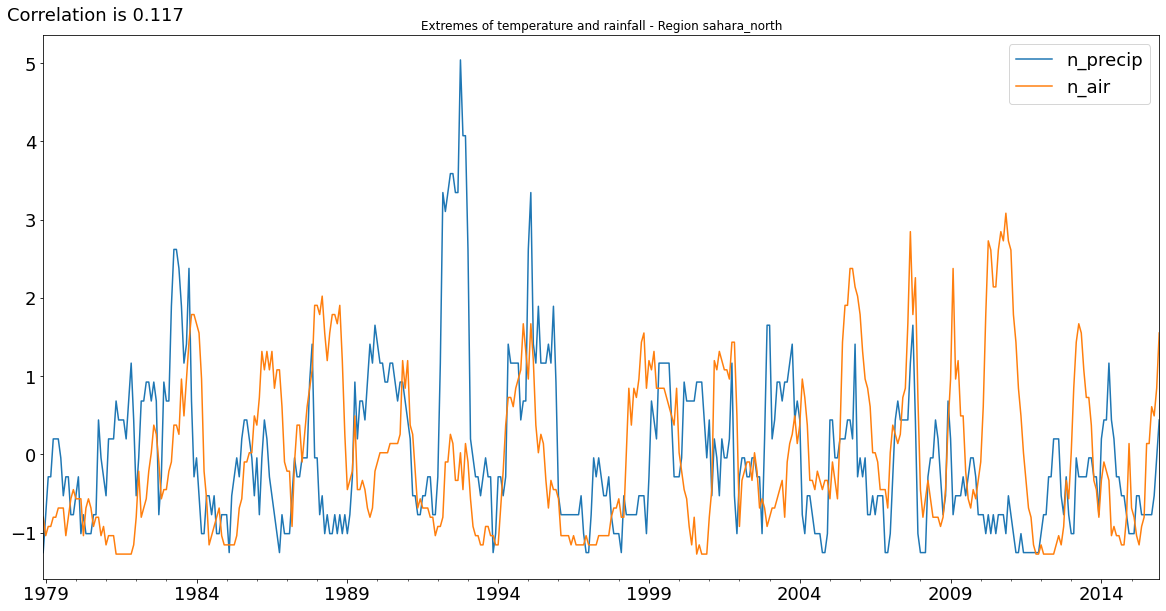

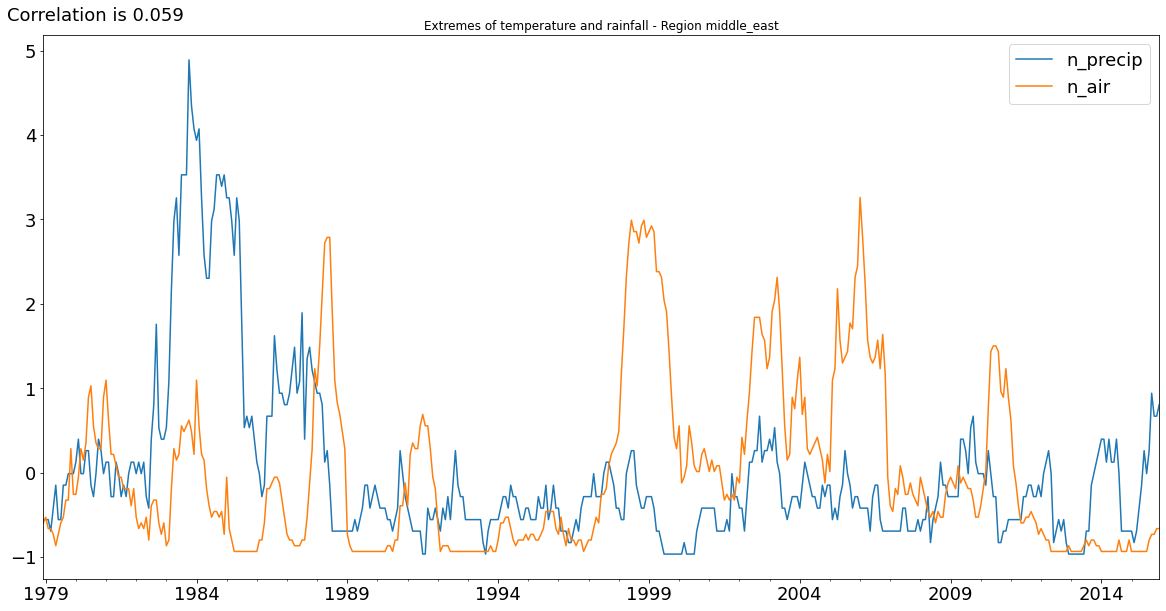

In [12]:
for region in regions:
    d = plot_rainfall_temperature(region)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


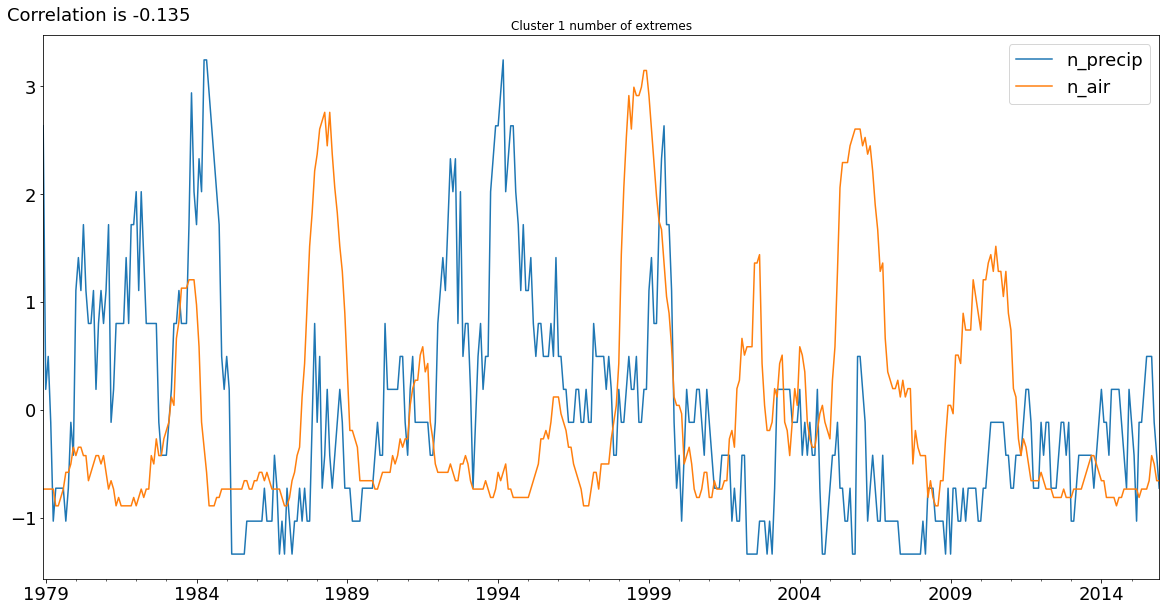

In [130]:
d1 = plot_rainfall_temperature(1)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


FileNotFoundError: [Errno 2] No such file or directory: '../plots/IDD/tempRainfall/cluster_0.png'

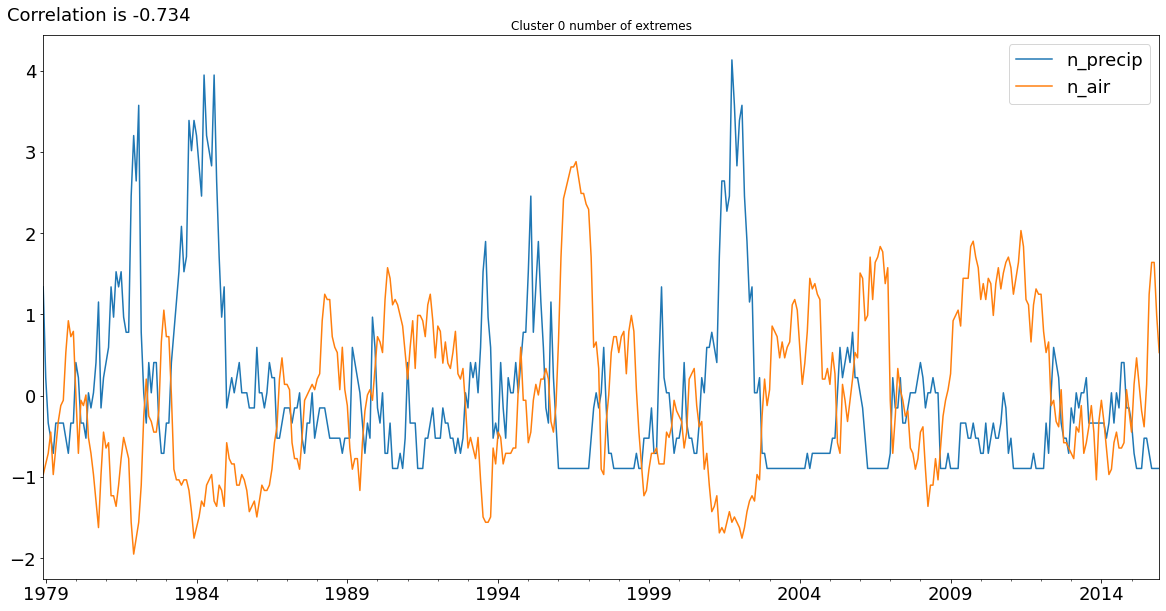

In [71]:
d0 = plot_rainfall_temperature(0)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


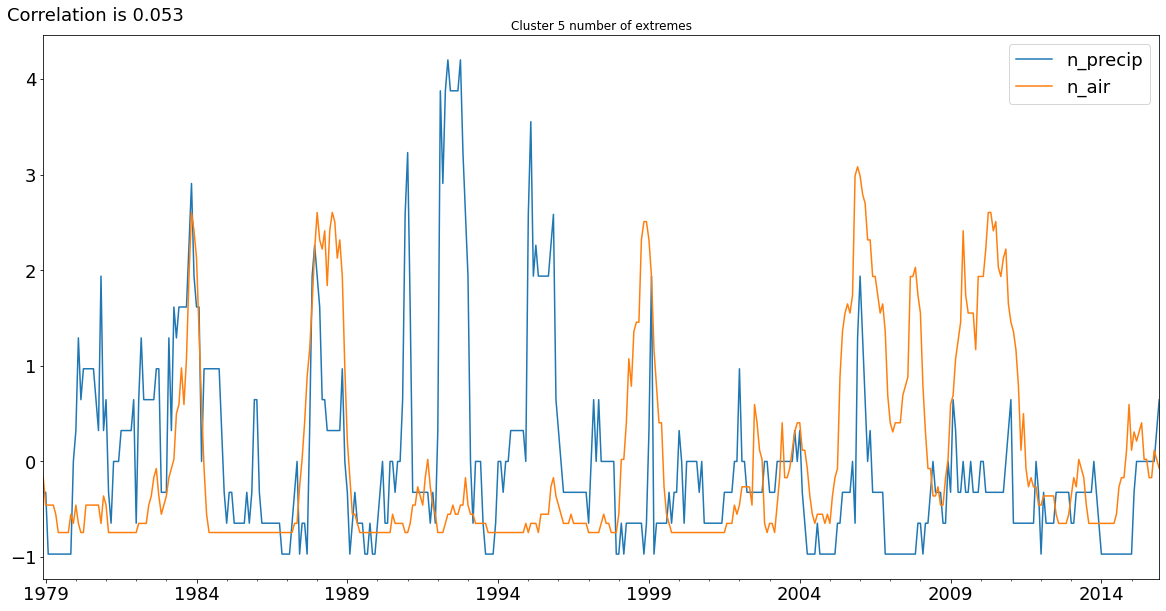

In [131]:
d5 = plot_rainfall_temperature(5)

In [123]:
xcov_monthly = [ef.crosscorr(d5["n_precip"],d5["n_air"],lag=i) for i in range(-12,12)]
lag = np.arange(-12,12)

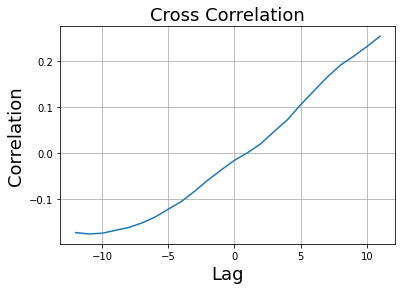

In [124]:
fig = plt.figure()
plt.plot(lag, xcov_monthly)
plt.title("Cross Correlation", fontsize = 18)
plt.ylabel("Correlation", fontsize = 18)
plt.xlabel("Lag", fontsize = 18)
plt.grid()

In [85]:
for i in range(-12,12):
    print("lag={}  cross-correlation:{}".format(i,xcov_monthly[i+12]))
    print(" ")

lag=-12  cross-correlation:-0.05893323226548245
 
lag=-11  cross-correlation:-0.10795662148582019
 
lag=-10  cross-correlation:-0.15498190241357485
 
lag=-9  cross-correlation:-0.21786569315710216
 
lag=-8  cross-correlation:-0.2749065636360091
 
lag=-7  cross-correlation:-0.32541573222678166
 
lag=-6  cross-correlation:-0.3818271252895554
 
lag=-5  cross-correlation:-0.43643356066132616
 
lag=-4  cross-correlation:-0.4876504319682506
 
lag=-3  cross-correlation:-0.527582803365937
 
lag=-2  cross-correlation:-0.567277798120866
 
lag=-1  cross-correlation:-0.5941862611847568
 
lag=0  cross-correlation:-0.6113644754585361
 
lag=1  cross-correlation:-0.5707733835302748
 
lag=2  cross-correlation:-0.5274303098031149
 
lag=3  cross-correlation:-0.46841503671588064
 
lag=4  cross-correlation:-0.41492110502299273
 
lag=5  cross-correlation:-0.36680723747354754
 
lag=6  cross-correlation:-0.3078676019797372
 
lag=7  cross-correlation:-0.24045917884590834
 
lag=8  cross-correlation:-0.171338901

In [76]:
d5

,n_precip,n_air
1978-12-01,3,51
1979-01-01,1,63
1979-02-01,2,60
1979-03-01,1,56
1979-04-01,2,56
...,...,...
2015-08-01,5,13
2015-09-01,5,13
2015-10-01,5,12
2015-11-01,3,17


In [7]:
def extreme_plot_rainfall_temperature(cluster_id, rolling_n =12, extreme_type = "dry", n_components = 6):   
    f = 12
    n = 30

    n_components = 6
    level = 12
    temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
    spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

    d = Data('../GPCC_half.nc','precip',temporal_limits, missing_value=-9.96921e+36)

    result = d.get_data()
    lon_list = d.get_lon_list()
    lat_list = d.get_lat_list()
    lon = d.get_lon()
    lat = d.get_lat()

    result = pf.deseasonalize(np.array(result))

    d = Data('../air_monthly_mean_africa.nc','air', missing_value=-9.96921e+36)

    result_air = d.get_data()
    lon_list_air = d.get_lon_list()
    lat_list_air = d.get_lat_list()
    lon_air = d.get_lon()
    lat_air = d.get_lat()

    result_air = pf.deseasonalize(np.array(result_air))

    #result = transform(result)

    air_list = list(zip(lon_list_air,lat_list_air))
    pre_list = list(zip(lon_list,lat_list))


    clean_list = []
    Idx = []
    loc_list = []
    for i in range(len(air_list)):
        temp = neighbour_average(pre_list,pd.DataFrame(result),air_list[i][0], air_list[i][1])
        if temp.shape:
        #if not np.isnan(temp):
            clean_list.append(temp)
            Idx.append(i)
            loc_list.append(air_list[i])

    precipitation = np.array(clean_list)#/np.array(clean_list).std()
    precipitation = pd.DataFrame(np.transpose(precipitation))

    result_air = pd.DataFrame(result_air)
    temperature = result_air.iloc[:,Idx]

    lon_list = [list(t) for t in zip(*loc_list)][0]
    lat_list = [list(t) for t in zip(*loc_list)][1]

    #lat_list = list(zip(*loc_list))[1]
    #lon_list = list(zip(*loc_list))[0]

    temp = np.array(precipitation)
    clustering = AgglomerativeClustering(n_clusters=n_components).fit(np.transpose(temp))

    df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

    lon_temp = df["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df["lons"] = lon_temp

    clusters = clustering.labels_

    Idx = np.where((df.clusters == cluster_id).values)[0]
    precip = precipitation.iloc[:,Idx]
    air = temperature.iloc[:,Idx]

    precip_agg = precip.rolling(rolling_n).apply(sum)
    precip_agg = precip_agg.iloc[rolling_n - 1:,:]

    air_agg = air.rolling(rolling_n).mean()
    air_agg = air_agg.iloc[rolling_n - 1:,:]

    N = precip_agg.shape[0]

    d3 = N - (n*f + 1)

    result_index_precip = []
    result_index_air = []
    for k in range(d3):
        onset = k
        end = k + (n*f - (rolling_n - 1))

        if extreme_type == "wet":
            a = precip_agg.iloc[onset:end,:].quantile(0.95).values
            b = precip_agg.iloc[end + (rolling_n - 1),:].values
            index = np.where(np.greater(b,a))[0]

        else:
            a = precip_agg.iloc[onset:end,:].quantile(0.05).values
            b = precip_agg.iloc[end + (rolling_n - 1),:].values

            c = air_agg.iloc[onset:end,:].quantile(0.95).values
            d = precip_agg.iloc[end + (rolling_n - 1),:].values

            index = np.where(np.greater(a,b))[0]
            index_air = np.where(np.greater(d,c))[0]
        result_index_precip.append(index)
        result_index_air.append(index_air)

    number_precip = []
    for i in range(len(result_index_precip)):
        number_precip.append(len(result_index_precip[i]))

    number_air = []
    for i in range(len(result_index_air)):
        number_air.append(len(result_index_air[i]))

    if rolling_n == 12:
        start_date = "19781201"
    else:
        start_date = "19780{}01".format(rolling_n)
    df_oni = pd.DataFrame({"n_precip":number_precip, "n_air":number_air},
                      index=pd.date_range(start_date, periods=len(number_precip), freq='MS')
                      )
    
    return(df_oni)

In [51]:
#temperature = temperature/temperature.stack().std()

precipitation.columns = temperature.columns

combined_vertically = pd.concat([temperature,precipitation],ignore_index=True,sort=False, axis=0)


clustering = AgglomerativeClustering(n_clusters=n_components).fit(combined_vertically.transpose())
#clustering = KMeans(n_clusters=n_components).fit(combined_vertically.transpose())

clusters_air = np.zeros(len(lon_list_air))
clusters_air.fill(-1)

clusters_air[Idx] = clustering.labels_ 

index = np.argwhere(clusters_air == -1)

clusters_air = np.delete(clusters_air, index)
lat_list_air = np.delete(lat_list_air, index)
lon_list_air = np.delete(lon_list_air, index)

df_air = pd.DataFrame({"lons":lon_list_air,"lats":lat_list_air,"clusters":clusters_air})

lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"] = lon_temp

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


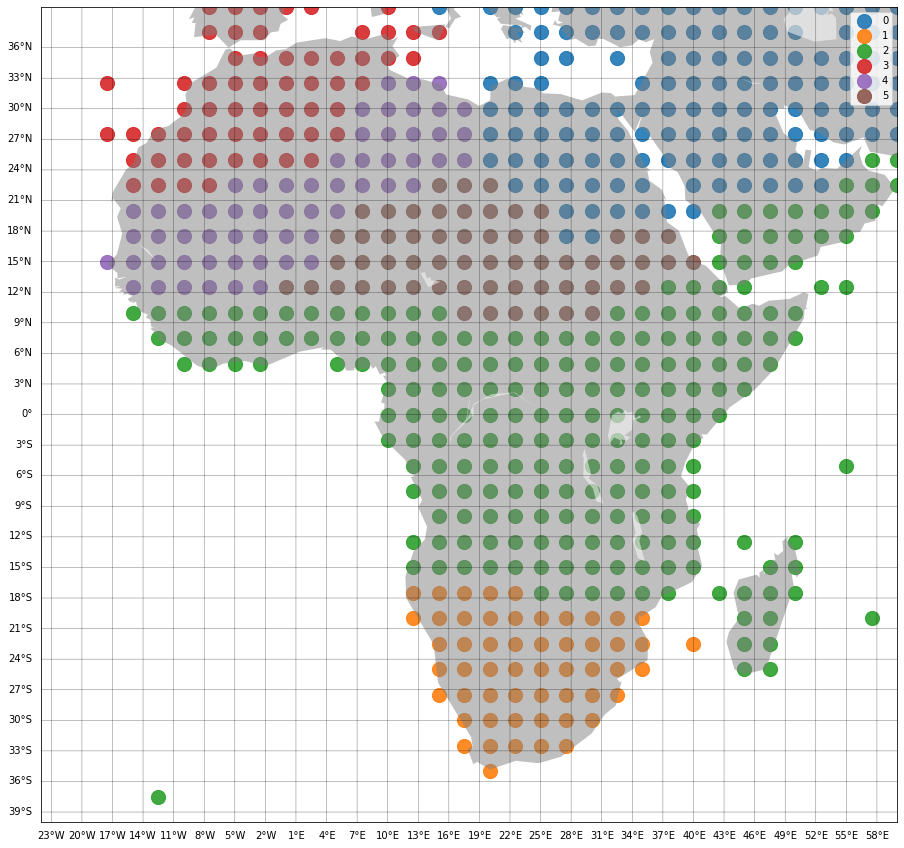

In [36]:
df_list = []
for j in range(len(set(clusters_air))):
    df_list.append(pd.DataFrame(columns=df_air.columns))

#lon = np.arange(-23.75,60.0,2.5)

#fig, ax = plt.subplots(2,1,1)
fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

i = 0
for j in set(clusters_air):
    values = df_air["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df_air.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i)
    i+=1

    
plt.legend()
#plt.savefig("6_Clusters_non_standard.png")
plt.show()

In [40]:
countries_1 = ['NA', 'BW','ZA','ZM','ZW','AO','MZ','LS']
countries_3 = ['ET','SO','KE','TZ','MG','UG','DJ']
countries_5 = ['CD','CG','CM','GA','CF','TG','GH', 'CI']
countries_2 = ['SD','TD','NE','NG','ML','MR','SN','GN','BJ','BF','SL','LR']
countries_4 = ['DZ','MA','TN']
countries_0 = ['LY','EG','IL','IQ','IR','JO','LB','SY','SA','AE','YE','OM','QA','KW']

#countries = ['ET']

#countries.append(countries_5)



rolling_n = 12
extreme_type = 'dry'
indicator='SP.POP.TOTL'
cluster = 0

In [44]:
def IID_plot_with_temp(cluster, countries_code, extreme_type = "dry"): 
    if extreme_type == "dry":
        file_name = "Data_{}.csv".format(cluster)
    else:
        file_name = "flood_{}.csv".format(cluster)
    et = pd.read_csv(file_name)
    et  = et.iloc[:,[0,4]]
    et  = et.dropna()
    et["year"] = pd.to_numeric(et["year"])
    
    df_oni = extreme_plot_rainfall_temperature(cluster,12, extreme_type = extreme_type)
    df_oni = df_oni.iloc[1:,:]

    N = df_oni.shape[0]
    df_oni = df_oni.rolling(12).sum()
    Idx = np.arange(11,N,12)
    df_oni = df_oni.iloc[Idx,:]

    year = np.arange(1979,2016)
    df_oni["year"] = year

    df = df_oni.merge(et)
    df = df.fillna(0)
    
    df = df.fillna(0)

    df = df.set_index("year")

    df_norm = (df - df.mean())/df.std()

    title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
    plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
    fig = plot.get_figure()
    filename = "../plots/IDD/temperature/cluster_{}_{}_with_temp.png".format(cluster, extreme_type)
    correlation = df_norm.corr(method = 'spearman')
    corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    #fig.text(0.1,0.9,fontsize=18)
    fig.savefig(filename)
    return(df_norm)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


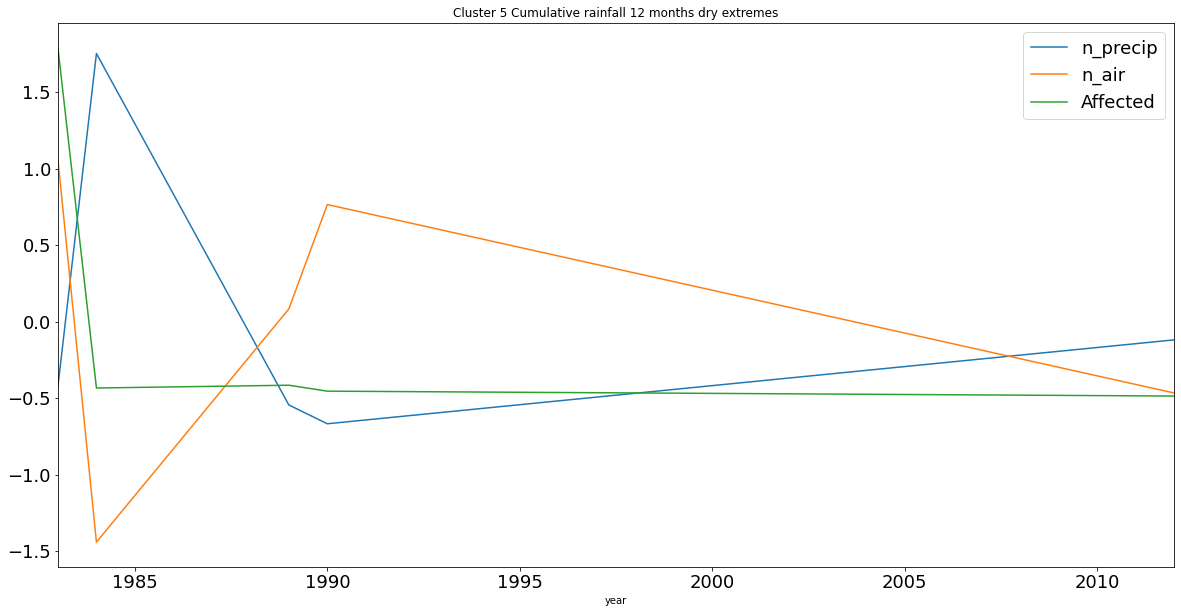

In [50]:
df_5 = IID_plot_with_temp(5, countries_5)

In [ ]:
def extreme_temperature_plot(cluster_id, rolling_n =12, extreme_type = "dry", n_components = 6):
    f = 12
    n = 30

    d = Data('../nc/air.mon.mean.nc.nc','air',temporal_limits,spatial_limits,missing_value=-9.969209968386869e+36)

    result = d.get_data()
    lon_list = d.get_lon_list()
    lat_list = d.get_lat_list()
    lon = d.get_lon()
    lat = d.get_lat()

    result = pd.DataFrame(result)
    result = pf.deseasonalize(np.array(result))
    #result = np.array(result)

    temp = np.array(result)
    clustering = AgglomerativeClustering(n_clusters=n_components).fit(np.transpose(temp))

    df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

    lon_temp = df["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df["lons"] = lon_temp

    clusters = clustering.labels_

    Idx = np.where((df.clusters == cluster_id).values)[0]

    d = Data('../precipitation.nc','precip',temporal_limits,missing_value=-9.969209968386869e+36)

    result = d.get_data()

    r = result[:,Idx]
    r = pd.DataFrame(r)


    RFThree = r.rolling(rolling_n).apply(sum)
    RFThree = RFThree.iloc[rolling_n - 1:,:]

    N = RFThree.shape[0]

    d3 = N - (n*f + 1)

    result_index = []
    for k in range(d3):
        onset = k
        end = k + (n*f - (rolling_n - 1))
        
        if extreme_type == "wet":
            a = RFThree.iloc[onset:end,:].quantile(0.95).values
            b = RFThree.iloc[end + (rolling_n - 1),:].values
            index = np.where(np.greater(b,a))[0]
            
        else:
            a = RFThree.iloc[onset:end,:].quantile(0.05).values
            b = RFThree.iloc[end + (rolling_n - 1),:].values
            index = np.where(np.greater(a,b))[0]

        result_index.append(index)

    number_cases = []
    for i in range(len(result_index)):
        number_cases.append(len(result_index[i]))
        
    
    if rolling_n == 12:
        start_date = "19761201"
    else:
        start_date = "19760{}01".format(rolling_n)
    df_oni = pd.DataFrame(number_cases,
                      columns=["number"],
                      index=pd.date_range(start_date, periods=len(number_cases), freq='MS'))

    oni = pd.read_csv("ONI.csv")
    
    if rolling_n == 12:
        oni_new = oni.iloc[323:792,:]
    elif rolling_n == 6:
        oni_new = oni.iloc[317:792,:]
    else:
        oni_new = oni.iloc[314:792,:]

    df_oni["oni"] = oni_new.iloc[:,5].values

    normalized_df=(df_oni-df_oni.mean())/df_oni.std()
    
    #title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster_id,rolling_n, extreme_type)
    #plot = normalized_df.plot(figsize=(20,10), title = title)
    #fig = plot.get_figure()
    #filename = "../plots/extreme_plot_{}_months_cluster_{}_{}.png".format(rolling_n,cluster_id, extreme_type)
    #correlation = normalized_df.corr()
    #corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
    #fig.text(0.1,0.9,corr_text,fontsize=18)
    #fig.savefig(filename)
    return(df_oni)

In [49]:
file_name = "Data_{}.csv".format(cluster)
et = pd.read_csv(file_name)
et  = et.iloc[:,[0,4]]
et  = et.dropna()
et["year"] = pd.to_numeric(et["year"])
df_oni = ef.extreme_plot(cluster,12)

df_oni = df_oni.iloc[1:,:]

N = df_oni.shape[0]

df_oni = df_oni.rolling(12).sum()

Idx = np.arange(11,N,12)

df_oni = df_oni.iloc[Idx,:]

year = np.arange(1977,2016)

df_oni["year"] = year

df = df_oni.merge(et, how = 'left')

df = df.fillna(0)

df = df.drop(["oni"], axis=1)

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/Extreme_functions.py:322: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  RFThree = r.rolling(rolling_n).apply(sum)


Text(0.1, 0.9, 'Correlation is -0.068')

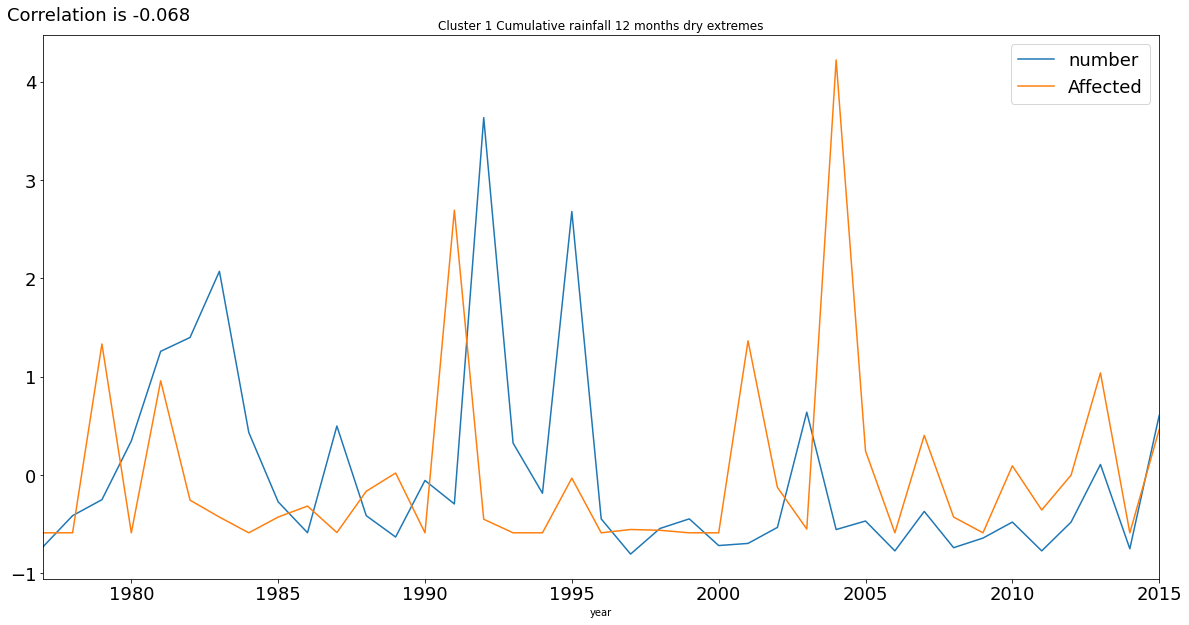

In [51]:
df = df.set_index("year")

df_norm = (df - df.mean())/df.std()

title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
fig = plot.get_figure()
filename = "../plots/IDD/cluster_{}_{}.png".format(cluster, extreme_type)
correlation = df_norm.corr()
corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
fig.text(0.1,0.9,corr_text,fontsize=18)

In [29]:
dat = wb.download(indicator=indicator, country=['ET','SO','KE','TZ','MG','UG','DJ'], start=1940, end=2019)

year = np.arange(2019,1959, -1)

#df = pd.DataFrame({"year":year,"POP":dat["SP.POP.TOTL"].values})

N = len(dat[indicator].keys())



years = []
countries = []
for i in range(N):
    countries.append(dat[indicator].keys()[i][0])
    years.append(dat[indicator].keys()[i][1])

years = list(set(years))
countries = list(set(countries))

result = []
for year in years:
    temp = 0
    for country in countries:
        temp += dat[indicator][(country, year)]
    result.append(temp)

years = [ int(x) for x in years ]

df_pop =pd.DataFrame({'year':years, 'pop':result})

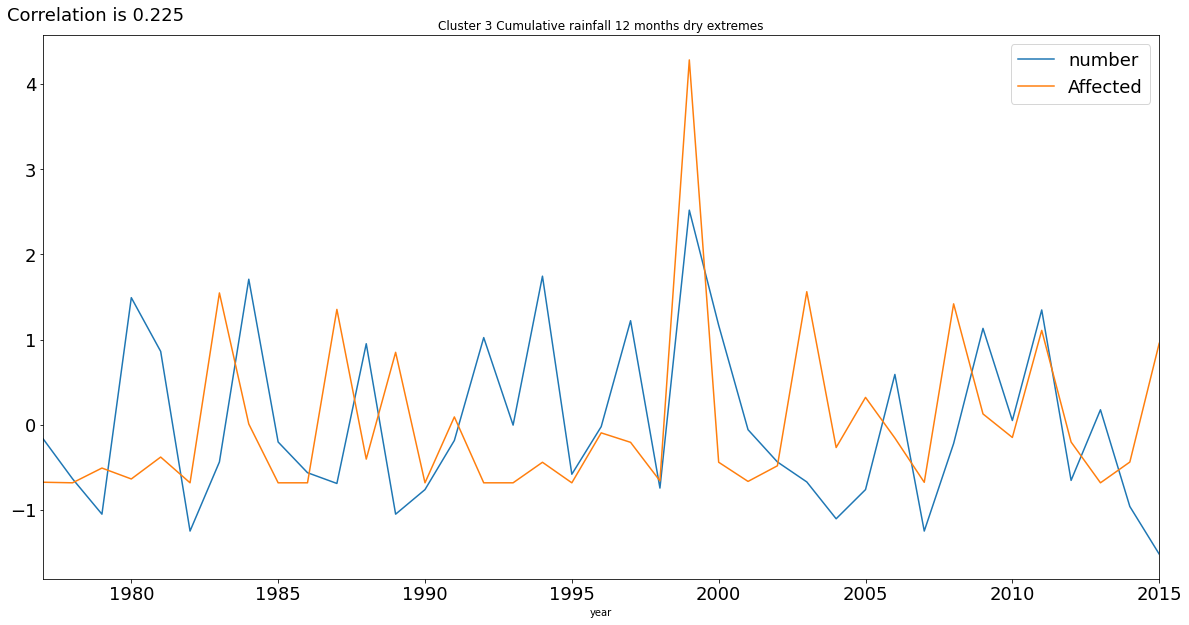

In [30]:
df = df.merge(df_pop, how='left')

df['Affected'] = df['Affected']/df['pop']

df = df.drop(["pop"], axis=1)

df = df.set_index("year")

df_norm = (df - df.mean())/df.std()

title = "Cluster {} Cumulative rainfall {} months {} extremes".format(cluster,rolling_n, extreme_type)
plot = df_norm.plot(figsize=(20,10), title = title, fontsize = 18).legend(fontsize = 18)
fig = plot.get_figure()
filename = "../plots/IDD/cluster_{}_{}.png".format(cluster, extreme_type)
correlation = df_norm.corr()
corr_text = "Correlation is {:.3f}".format(correlation.iloc[0,1])
fig.text(0.1,0.9,corr_text,fontsize=18)
fig.savefig(filename)

#df_norm.plot()

#df.corr()